# Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load and combine data 
df_flu = pd.read_csv('training_set_features.csv',index_col = 0)
df_lable = pd.read_csv('training_set_labels.csv',index_col = 0)
df_full = df_flu.join(df_lable)

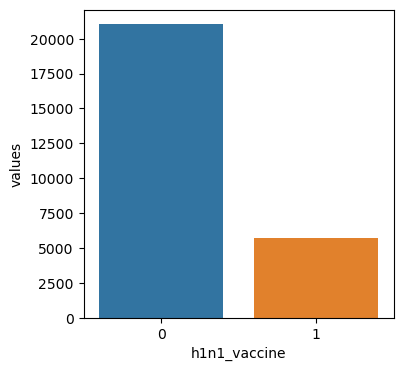

In [3]:
# H1N1: the number of people vaccinated or not
df_h1n1_bal = pd.DataFrame({'h1n1_vaccine': df_full['h1n1_vaccine'].value_counts().index,'values': df_full['h1n1_vaccine'].value_counts().values})
plt.figure(figsize = (4,4))
sns.barplot(x = 'h1n1_vaccine', y = "values", data = df_h1n1_bal)
plt.show()

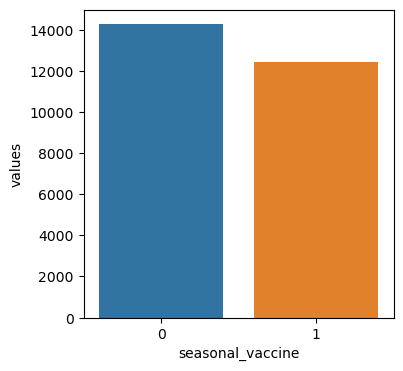

In [4]:
# Seasonal flu: the number of people vaccinated or not
df_sea_bal = pd.DataFrame({'seasonal_vaccine': df_full['seasonal_vaccine'].value_counts().index,'values': df_full['seasonal_vaccine'].value_counts().values})
plt.figure(figsize = (4,4))
sns.barplot(x = 'seasonal_vaccine', y = "values", data = df_sea_bal)
plt.show()

### Heat map

#### h1n1_Behavioral Responses

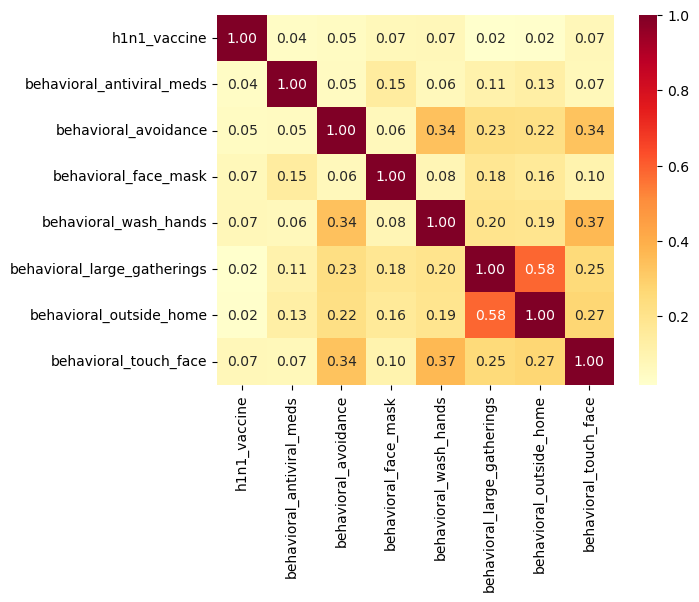

In [7]:
h1n1_behavior_plot = sns.heatmap(df_full[["h1n1_vaccine","behavioral_antiviral_meds","behavioral_avoidance",
                    "behavioral_face_mask","behavioral_wash_hands",
                    "behavioral_large_gatherings","behavioral_outside_home",
                    "behavioral_touch_face"]].corr(),annot = True, fmt = ".2f", cmap = "YlOrRd")

#### h1n1_Opinion Responses

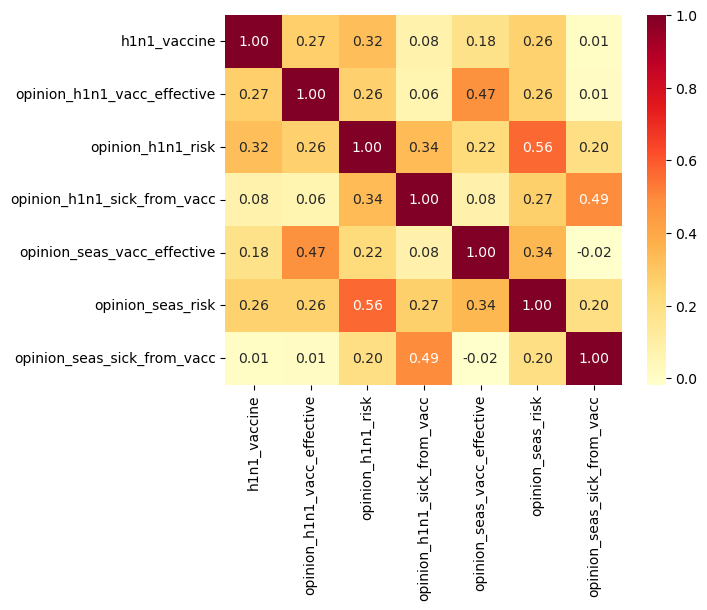

In [8]:
h1n1_opinion_plot = sns.heatmap(df_full[["h1n1_vaccine","opinion_h1n1_vacc_effective","opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective",
                    "opinion_seas_risk","opinion_seas_sick_from_vacc"]].corr(),annot = True, fmt = ".2f", cmap = "YlOrRd")

#### Seasonal Flu Vaccine_Behavioral Responses

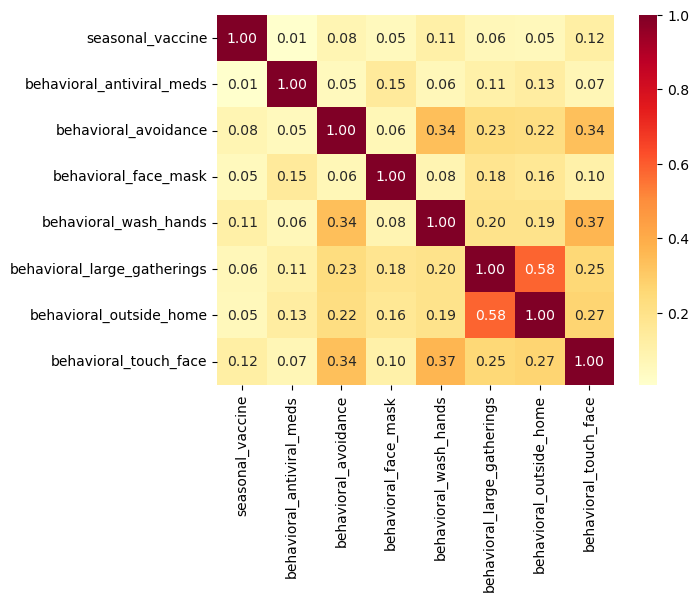

In [9]:
seas_behavior_plot = sns.heatmap(df_full[["seasonal_vaccine","behavioral_antiviral_meds","behavioral_avoidance",
                    "behavioral_face_mask","behavioral_wash_hands",
                    "behavioral_large_gatherings","behavioral_outside_home",
                    "behavioral_touch_face"]].corr(),annot = True, fmt = ".2f", cmap = "YlOrRd")

#### Seasonal Flu Vaccine_Opinion Responses

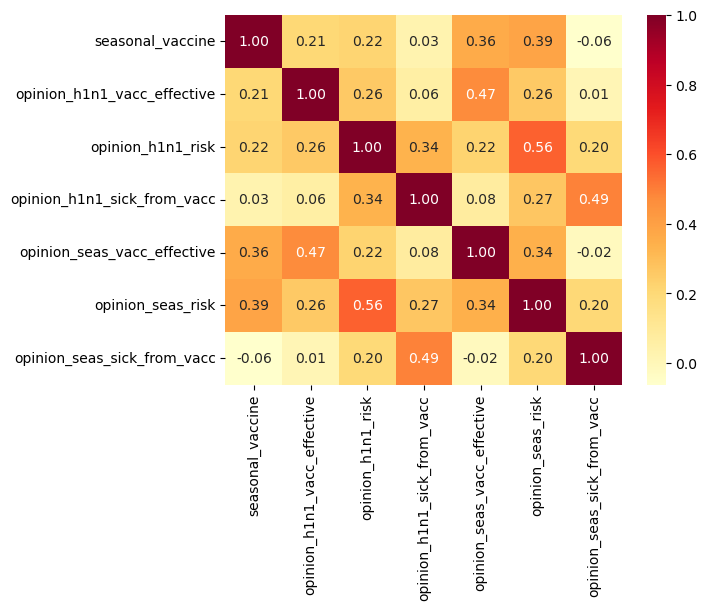

In [10]:
seas_opinion_plot = sns.heatmap(df_full[["seasonal_vaccine","opinion_h1n1_vacc_effective","opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective",
                    "opinion_seas_risk","opinion_seas_sick_from_vacc"]].corr(),annot = True, fmt = ".2f", cmap = "YlOrRd")

# Pre-processing

## method1: Imputation

### imputation with mode

In [11]:
# delete labels with more than 10000 missing values
print(df_full.isna().sum())
df_full = df_full.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis = 1)
df_full

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1


In [12]:
# check if there are duplicate values
df_full[df_full.duplicated(keep = False)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,


In [13]:
# print out the row where the missing values are located
df_full[df_full.isna().any(axis = 1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
16,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,NaN,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,1,1
24,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Own,Unemployed,oxchjgsf,Non-MSA,2.0,0.0,0,0
26,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,Married,NaN,Employed,mlyzmhmf,"MSA, Principle City",1.0,2.0,1,1
29,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,Below Poverty,Not Married,Rent,Employed,atmpeygn,Non-MSA,1.0,2.0,0,0
26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"> $75,000",Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,0,0
26696,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,NaN,Married,Own,Employed,bhuqouqj,"MSA, Principle City",1.0,0.0,1,1


In [14]:
# drop rows that have more than 18 missing values
df_full = df_full.dropna(thresh = 18).copy()
df_full

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1


In [15]:
# imputation with mode
for col in df_full:    
    df_full[col].fillna(df_full[col].mode()[0], inplace = True)
    
df_full.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [16]:
df_full.to_csv('fl_preprocessing.csv')

### hot encoding

In [17]:
df_full = pd.read_csv('fl_preprocessing.csv')

In [18]:
# convert text labels to hot code
df_full  =  pd.concat([df_full,pd.get_dummies(df_full['census_msa'], prefix = 'census_msa'),
                pd.get_dummies(df_full['age_group'], prefix = 'age'),
                pd.get_dummies(df_full['education'], prefix = 'education'),
                pd.get_dummies(df_full['race'], prefix = 'race'),
                pd.get_dummies(df_full['sex'], prefix = 'sex'),
                pd.get_dummies(df_full['marital_status'], prefix = 'marital_status'),
                pd.get_dummies(df_full['rent_or_own'], prefix = 'rent_or_own'),
                pd.get_dummies(df_full['hhs_geo_region'], prefix = 'hhs_geo_region'),
                pd.get_dummies(df_full['employment_status'], prefix = 'employment_status'),
                pd.get_dummies(df_full['income_poverty'], prefix = 'income_poverty')],axis = 1)
                

df_full.drop(['census_msa'],axis = 1, inplace = True)
df_full.drop(['age_group'],axis = 1, inplace = True)
df_full.drop(['education'],axis = 1, inplace = True)
df_full.drop(['race'],axis = 1, inplace = True)
df_full.drop(['sex'],axis = 1, inplace = True)
df_full.drop(['marital_status'],axis = 1, inplace = True)
df_full.drop(['rent_or_own'],axis = 1, inplace = True)
df_full.drop(['hhs_geo_region'],axis = 1, inplace = True)
df_full.drop(['employment_status'],axis = 1, inplace = True)
df_full.drop(['income_poverty'],axis = 1, inplace = True)

df_full

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,1,0,0
26647,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0
26648,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,1,0,0
26649,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,0


In [19]:
#df_full.to_csv('hot_encoding_imputation.csv')

## method 2: PCA

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [67]:
df_full = pd.read_csv('training_set_features.csv',index_col = 0)
df_full

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [68]:
# convert text labels to hot code
df_full  =  pd.concat([df_full,
                        pd.get_dummies(df_full['age_group'], prefix = 'age'),
                        pd.get_dummies(df_full['education'], prefix = 'education'),
                        pd.get_dummies(df_full['race'], prefix = 'race'),
                        pd.get_dummies(df_full['sex'], prefix = 'sex'),
                        pd.get_dummies(df_full['income_poverty'], prefix = 'income_poverty'),
                        pd.get_dummies(df_full['marital_status'], prefix = 'marital_status'),
                        pd.get_dummies(df_full['rent_or_own'], prefix = 'rent_or_own'),
                        pd.get_dummies(df_full['employment_status'], prefix = 'employment_status'),
                        pd.get_dummies(df_full['hhs_geo_region'], prefix = 'hhs_geo_region'),
                        pd.get_dummies(df_full['census_msa'], prefix = 'census_msa'),
                        pd.get_dummies(df_full['employment_industry'], prefix = 'employment_industry'),
                        pd.get_dummies(df_full['employment_occupation'], prefix = 'employment_occupation'),],axis = 1)
 
df_full.drop(['age_group'],axis = 1, inplace = True)
df_full.drop(['education'],axis = 1, inplace = True)
df_full.drop(['race'],axis = 1, inplace = True)
df_full.drop(['sex'],axis = 1, inplace = True)
df_full.drop(['income_poverty'],axis = 1, inplace = True)
df_full.drop(['marital_status'],axis = 1, inplace = True)
df_full.drop(['rent_or_own'],axis = 1, inplace = True)
df_full.drop(['employment_status'],axis = 1, inplace = True)
df_full.drop(['hhs_geo_region'],axis = 1, inplace = True)
df_full.drop(['census_msa'],axis = 1, inplace = True)
df_full.drop(['employment_industry'],axis = 1, inplace = True)
df_full.drop(['employment_occupation'],axis = 1, inplace = True)

df_full

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
for col in df_full:
    # imputation with mode
    df_full[col].fillna(df_full[col].mode()[0], inplace = True)
df_full.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 105, dtype: int64

In [70]:
df_full.to_csv('hot_encoding_pca.csv')

In [71]:
# Calculate the cumulative contribution rate of principal components
pca=PCA()
pca.fit(df_full)
print(np.cumsum(pca.explained_variance_ratio_))

[0.20050765 0.30562237 0.36600785 0.41868553 0.46520015 0.50253357
 0.53685122 0.56850807 0.59708922 0.62309742 0.64741245 0.66848556
 0.68664085 0.70442872 0.72129427 0.73689327 0.75030035 0.76346768
 0.77597407 0.78807994 0.79831727 0.80830141 0.8180726  0.82696238
 0.83566534 0.84367359 0.85107381 0.85839703 0.86551289 0.87195947
 0.87780505 0.88340854 0.88887617 0.89396996 0.8989447  0.90386988
 0.90870111 0.91328267 0.91777677 0.92213906 0.92633088 0.93018419
 0.93398009 0.93769007 0.94111736 0.9444426  0.94764224 0.95071924
 0.95375815 0.95664717 0.95946673 0.96225643 0.96468154 0.96699731
 0.96909612 0.97114033 0.97317403 0.9751848  0.97690833 0.97839956
 0.97983016 0.98118219 0.98247153 0.98371851 0.98483016 0.98591981
 0.98689865 0.98779252 0.98862951 0.98943959 0.99016247 0.99081226
 0.99144372 0.99205201 0.99265126 0.9931936  0.99373051 0.99423894
 0.99474147 0.99521919 0.99566096 0.99608415 0.99650459 0.99690751
 0.99728679 0.99765301 0.99800033 0.99833815 0.99866665 0.9989

Text(0.5, 1.0, 'Scree Plot')

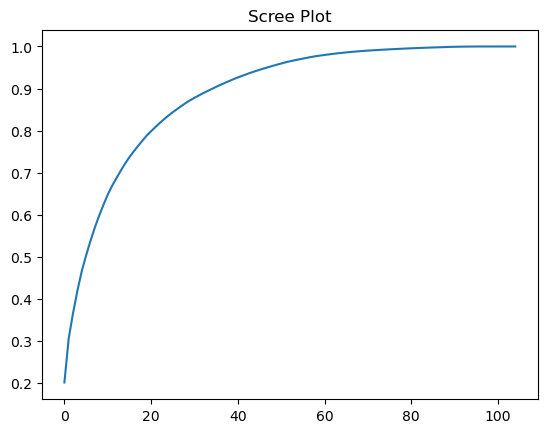

In [72]:
# scree plot and choose the suitable number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')

In [73]:
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components = 60)
X_pca = pca.fit_transform(df_full)
X_pca = pd.DataFrame(X_pca)

In [80]:
df_label = pd.read_csv('training_set_labels.csv',index_col = 0)
df_full = X_pca.join(df_label)
df_full
df_full.to_csv("fl_preprocessing_pca.csv")

# Modeling

## Imputation data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('hot_encoding_imputation.csv', index_col = 0)

### Split Training Test Data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [45]:
# splitting test and training (H1N1)
x1 = data.loc[:, ~data.columns.isin(['h1n1_vaccine'])]
y1 = data["h1n1_vaccine"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2)

# splitting test and training (Seasonal Flu)
x2 = data.loc[:, ~data.columns.isin(['seasonal_vaccine'])]
y2 = data["seasonal_vaccine"]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)

# standard scaling
scaler = StandardScaler()  
scaler.fit(x1_train)

x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)
 
scaler.fit(x2_train)

x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)

### Feature Selection - Logisti Regression

#### H1N1

In [46]:
# Feature Selection with Logisti Regression
sfm_h1n1 = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1',solver = 'liblinear'))
sfm_h1n1.fit(x1_train, y1_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [47]:
sfm_h1n1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True])

In [48]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
imputed_h1n1 = pd.DataFrame(imputer.fit_transform(x1_train))

# Imputation removed column names; put them back
imputed_h1n1.columns = x1.columns

selected_feat_h1n1 = imputed_h1n1.columns[(sfm_h1n1.get_support())]
print('total features: {}'.format((x1_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_h1n1)))

print(selected_feat_h1n1)

total features: 62
selected features: 55
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'seasonal_vaccine',
       'census_msa_MSA, Not Principle  City', 'census_msa_Non-MSA',
       'age_18 - 34 Years', 'age_35 - 44 Years', 'age_45 - 54 Years',
       'age_55 - 64 Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple'

#### Seasonal Flu

In [49]:
# Feature Selection with Logisti Regression
sfm_sea = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1',solver = 'liblinear'))
sfm_sea.fit(x2_train, y2_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [50]:
sfm_sea.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True])

In [51]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
imputed_sea = pd.DataFrame(imputer.fit_transform(x2_train))

# Imputation removed column names; put them back
imputed_sea.columns = x2.columns

selected_feat_sea = imputed_sea.columns[(sfm_sea.get_support())]
print('total features: {}'.format((x2_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_sea)))

print(selected_feat_sea)

total features: 62
selected features: 56
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine',
       'census_msa_MSA, Not Principle  City', 'census_msa_Non-MSA',
       'age_18 - 34 Years', 'age_35 - 44 Years', 'age_45 - 54 Years',
       'age_55 - 64 Years', 'age_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate', 'race_Black',
       'race_Hispanic', 'race_Other or 

### Feature Specification

In [52]:
x1_train_sel = sfm_h1n1.transform(x1_train)
x1_test_sel = sfm_h1n1.transform(x1_test)

x2_train_sel = sfm_sea.transform(x2_train)
x2_test_sel = sfm_sea.transform(x2_test)

In [53]:
x1_train_sel.shape, x1_test_sel.shape

((21320, 55), (5331, 55))

In [54]:
x1_train.shape, x1_test.shape

((21320, 62), (5331, 62))

In [55]:
x2_train_sel.shape, x2_test_sel.shape

((21320, 56), (5331, 56))

In [56]:
x2_train.shape, x2_test.shape

((21320, 62), (5331, 62))

### method 1.1:  Random forest_h1n1

In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
#define parameter for RandomForestClassifier
param_dist = {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400]
        }

rf = RandomForestClassifier()

rf_cv1 = RandomizedSearchCV(estimator = rf, 
                                   param_distributions = param_dist, 
                                   scoring = 'roc_auc', 
                                   verbose = 10)
rf_cv1.fit(x1_train_sel, y1_train)

print(rf_cv1.best_params_)
print(rf_cv1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 1/10] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.856 total time=   1.4s
[CV 2/5; 1/10] START bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 1/10] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   1.4s
[CV 3/5; 1/10] START bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 1/10] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.871 total time=   1.3s
[CV 4/5; 1/10] START bootstrap=True, max_depth=6, max_features=sqrt, min_samples_lea

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.866 total time=   2.5s
[CV 2/5; 2/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.870 total time=   2.5s
[CV 3/5; 2/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.880 total time=   2.5s
[CV 4/5; 2/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.870 total time=   2.5s
[CV 5/5; 2/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.867 total time=   2.6s
[CV 1/5; 3/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 1/5; 3/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.865 total time=   2.7s
[CV 2/5; 3/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/5; 3/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.869 total time=   2.7s
[CV 3/5; 3/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/5; 3/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.866 total time=   5.5s
[CV 2/5; 5/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.870 total time=   5.5s
[CV 3/5; 5/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.879 total time=   5.5s
[CV 4/5; 5/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.871 total time=   5.4s
[CV 5/5; 5/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.867 total time=   5.6s
[CV 1/5; 6/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 1/5; 6/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.868 total time=   5.3s
[CV 2/5; 6/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 2/5; 6/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.870 total time=   5.4s
[CV 3/5; 6/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 3/5; 6/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, scor

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.861 total time=   3.4s
[CV 2/5; 7/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.866 total time=   3.3s
[CV 3/5; 7/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.876 total time=   3.4s
[CV 4/5; 7/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.869 total time=   3.4s
[CV 5/5; 7/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.864 total time=   3.4s
[CV 1/5; 8/10] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 1/5; 8/10] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.861 total time=   3.5s
[CV 2/5; 8/10] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 2/5; 8/10] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.866 total time=   3.4s
[CV 3/5; 8/10] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 3/5; 8/10] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.876 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.865 total time=   5.4s
[CV 2/5; 10/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.869 total time=   5.4s
[CV 3/5; 10/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.879 total time=   5.4s
[CV 4/5; 10/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.871 total time=   5.4s
[CV 5/5; 10/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.867 total time=   5.4s


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
0.8709482604849


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on test set: 87.62%
Precision on test set: 74.62%
Recall on test set: 47.86%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


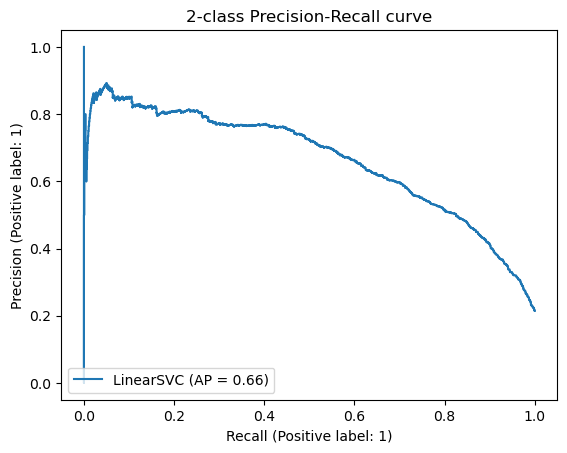

In [37]:
#Using the tuned random forest parameters
rf1  =  RandomForestClassifier(n_estimators  =  200,
                             min_samples_split  =  5,
                             min_samples_leaf  =  4,
                             max_features  =  'auto',
                             max_depth  =  20, 
                             bootstrap  =  True,
                             random_state  =  123)

rf_cv1  =  RandomizedSearchCV(rf1, param_distributions  =  param_dist, 
                           cv  =  10, scoring = 'roc_auc',random_state = 123, n_jobs  =  -1)

rfcv1fit  =  rf_cv1.fit(x1_train_sel, y1_train)
rf_y_pred  =  rf_cv1.predict(x1_test_sel)

accuracy  =  round(rf_cv1.score(x1_test_sel, y1_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

precision  =  round(precision_score(y_true = y1_test, y_pred = rf_y_pred) * 100, 2)
print(f"Precision on test set: {precision}%")

recall  =  round(recall_score(y_true = y1_test, y_pred = rf_y_pred) * 100, 2)
print(f"Recall on test set: {recall}%")

# Plot 2-class Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 50))
classifier.fit(x1_train_sel, y1_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x1_test_sel, y1_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

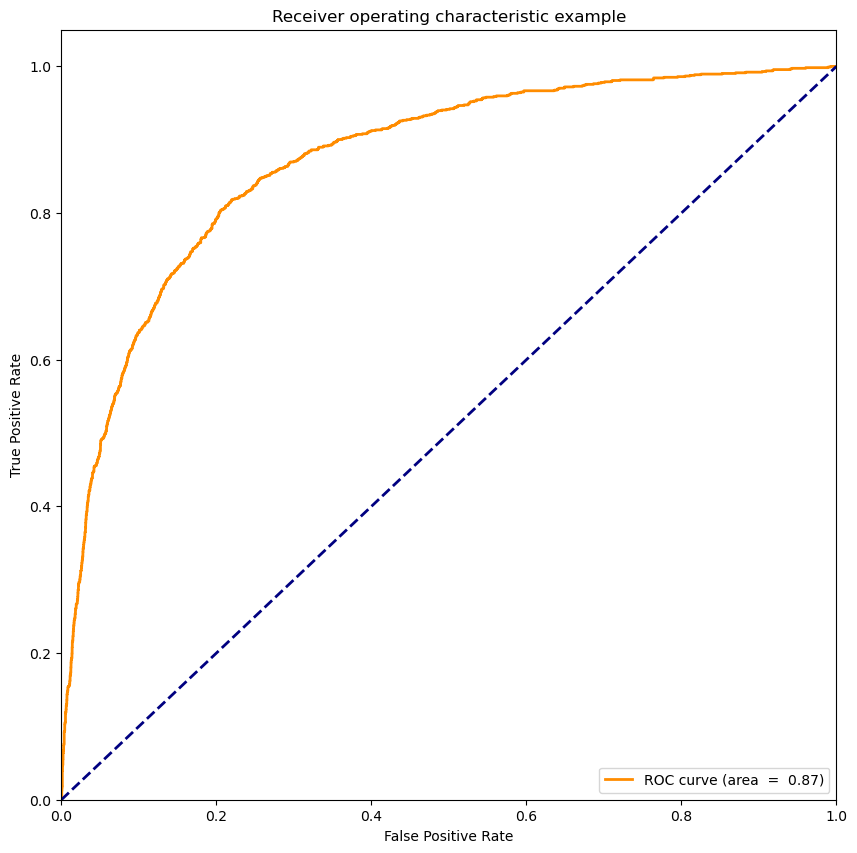

In [38]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 

# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True,random_state = 123)
 
# Calculate the value of y_score by decision_function()
y_score  =  svm.fit(x1_train_sel, y1_train).decision_function(x1_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y1_test, y_score)
# Calculate AUC
roc_auc  =  auc(fpr,tpr) 
 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))

# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 1.2: Decision Tree_h1n1

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [58]:
#instead of just doing the tree, trying to find the right parameters. 
param_dist  =  {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini"]}

tree  =  DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv  =  RandomizedSearchCV(tree, param_distributions = param_dist, cv = 10, n_iter = 100, random_state = 123)

# Fit it to the data
tree_cv.fit(x1_train_sel, y1_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 8, 'criterion': 'gini'}


Accuracy: 82.91%
Precision: 63.34%
Recall: 43.78%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


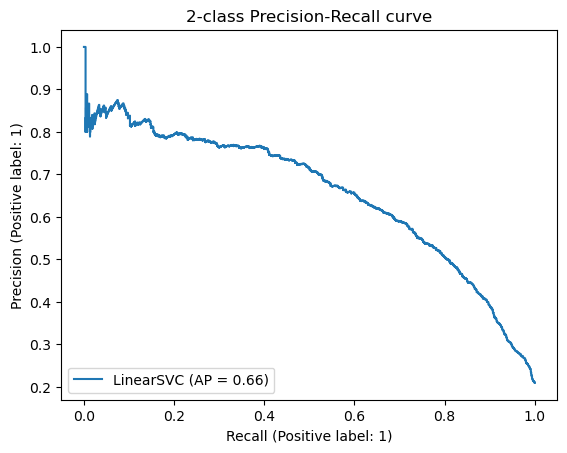

In [59]:
#Using the tuned decision tree parameters
dt2  =  DecisionTreeClassifier(criterion =  'gini', max_depth = 8, 
                                     max_features = 9, min_samples_leaf = 2, 
                                     random_state = 123)
dt2fit  =  dt2.fit(x1_train_sel, y1_train)
dt_y_pred2  =  dt2.predict(x1_test_sel)

accuracy  =  round(dt2.score(x1_test_sel, y1_test) * 100, 2)
precision  =  round(precision_score(y_true  =  y1_test, y_pred  =  dt_y_pred2) * 100, 2)
recall  =  round(recall_score(y_true  =  y1_test, y_pred  =  dt_y_pred2) * 100, 2)

print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')

# Plot the Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 50))
classifier.fit(x1_train_sel, y1_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x1_test_sel, y1_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

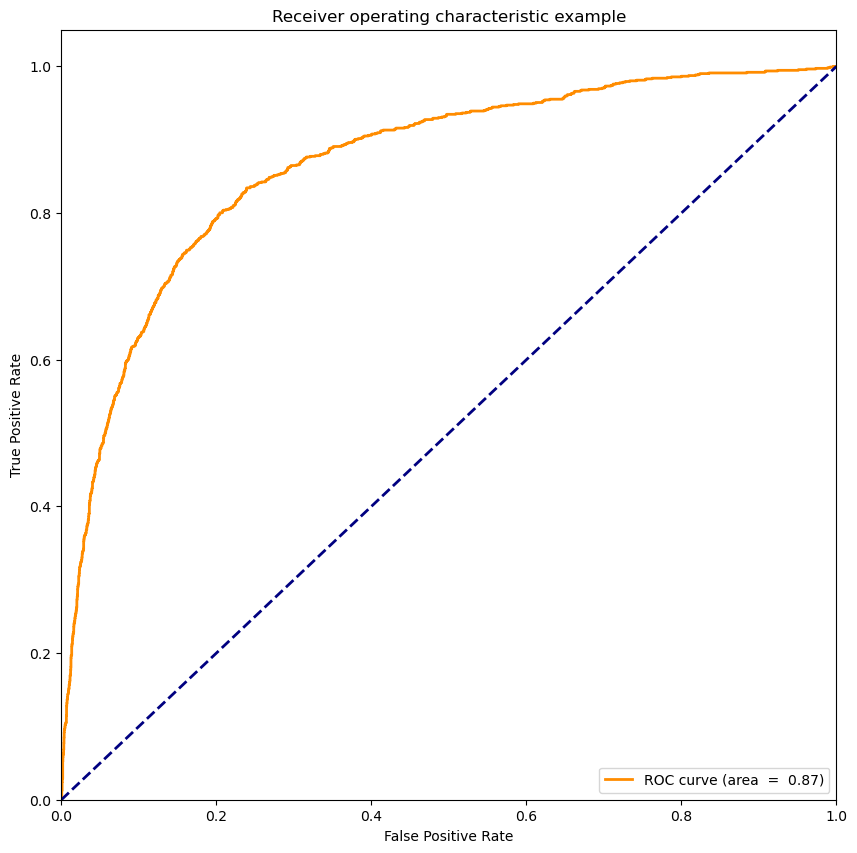

In [60]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 

# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True, random_state = 123)
 
# Calculate the value of y_score by decision_function()
y1_score  =  svm.fit(x1_train_sel, y1_train).decision_function(x1_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y1_test, y1_score) 
# Caculate AUC
roc_auc  =  auc(fpr,tpr) 

 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 1.1: Random Forest_seasonal

In [39]:
#define parameter for RandomForestClassifier
param_dist  =  {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400]
        }

rf  =  RandomForestClassifier()

rf_cv2  =  RandomizedSearchCV(estimator = rf, 
                                   param_distributions = param_dist, 
                                   scoring = 'roc_auc', 
                                   verbose = 10)
rf_cv2.fit(x2_train_sel, y2_train)

print(rf_cv2.best_params_)
print(rf_cv2.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 1/5; 1/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.878 total time=   2.7s
[CV 2/5; 1/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 2/5; 1/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.877 total time=   2.7s
[CV 3/5; 1/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 1/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.879 total time=   2.7s
[CV 4/5; 1/10] START bootstrap=False, max_depth=10, max_features=s

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/10] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.878 total time=   4.0s
[CV 2/5; 6/10] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/10] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.877 total time=   4.0s
[CV 3/5; 6/10] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/10] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.879 total time=   4.0s
[CV 4/5; 6/10] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/10] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.878 total time=   4.0s
[CV 5/5; 6/10] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/10] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.868 total time=   4.0s
[CV 1/5; 7/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.870 total time=   3.6s
[CV 2/5; 7/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.870 total time=   3.6s
[CV 3/5; 7/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.871 total time=   3.5s
[CV 4/5; 7/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.871 total time=   3.6s
[CV 5/5; 7/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.860 total time=   3.6s
[CV 1/5; 8/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 8/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.878 total time=   4.5s
[CV 2/5; 8/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 8/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.875 total time=   4.5s
[CV 3/5; 8/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 8/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.870 total time=   2.8s
[CV 2/5; 10/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.870 total time=   2.8s
[CV 3/5; 10/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.871 total time=   2.8s
[CV 4/5; 10/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.871 total time=   2.8s
[CV 5/5; 10/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.860 total time=   2.8s
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.8776838482491662


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on test set: 86.91%
Precision on test set: 77.73%
Recall on test set: 77.86%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


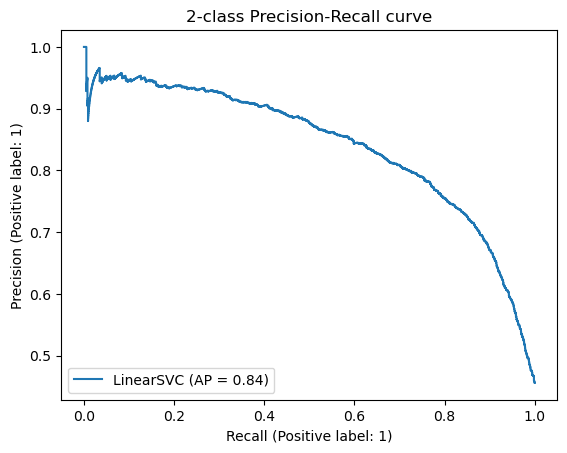

In [40]:
#Using the tuned random forest parameters
rf2  =  RandomForestClassifier(n_estimators  =  200,
                             min_samples_split  =  10,
                             min_samples_leaf  =  4,
                             max_features  =  'sqrt',
                             max_depth  =  20, 
                             bootstrap  =  True,
                             random_state  =  123)

rf_cv2  =  RandomizedSearchCV(rf2, param_distributions  =  param_dist, 
                           cv  =  10, scoring = 'roc_auc',random_state = 123, n_jobs  =  -1)

rfcv2fit  =  rf_cv2.fit(x2_train_sel, y2_train)
rf_y_pred  =  rf_cv2.predict(x2_test_sel)


accuracy  =  round(rf_cv2.score(x2_test_sel, y2_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

precision  =  round(precision_score(y_true = y2_test, y_pred = rf_y_pred) * 100, 2)
print(f"Precision on test set: {precision}%")

recall  =  round(recall_score(y_true = y2_test, y_pred = rf_y_pred) * 100, 2)
print(f"Recall on test set: {recall}%")

# Plot 2-class Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 123))
classifier.fit(x2_train, y2_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x2_test, y2_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

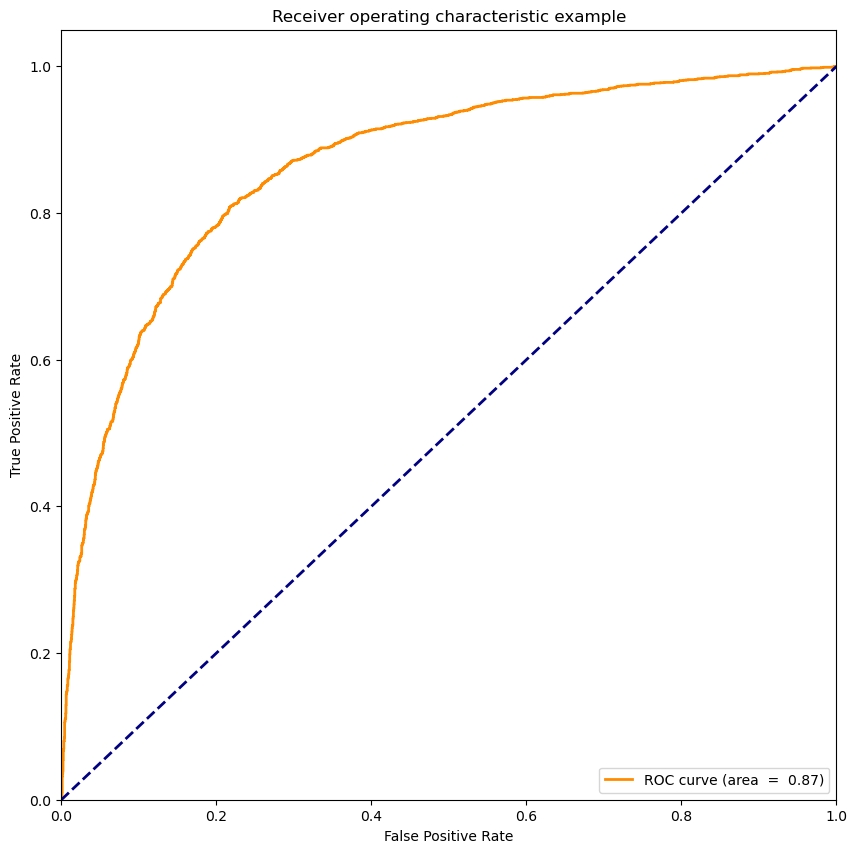

In [41]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 


# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True,random_state = 123)
 
# Calculate the value of y_score by decision_function()
y_score  =  svm.fit(x2_train_sel, y2_train).decision_function(x2_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y2_test, y_score)
# Calculate AUC
roc_auc  =  auc(fpr,tpr)
 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 1.2: Decision Tree_seasonal

In [61]:
#instead of just doing the tree, trying to find the right parameters. 
param_dist  =  {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini"]}

tree  =  DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv  =  RandomizedSearchCV(tree, param_distributions = param_dist, cv = 10, n_iter = 100, random_state = 123)

# Fit it to the data
tree_cv.fit(x2_train_sel, y2_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 9, 'criterion': 'gini'}


Accuracy: 77.25%
Precision: 78.52%
Recall: 71.66%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


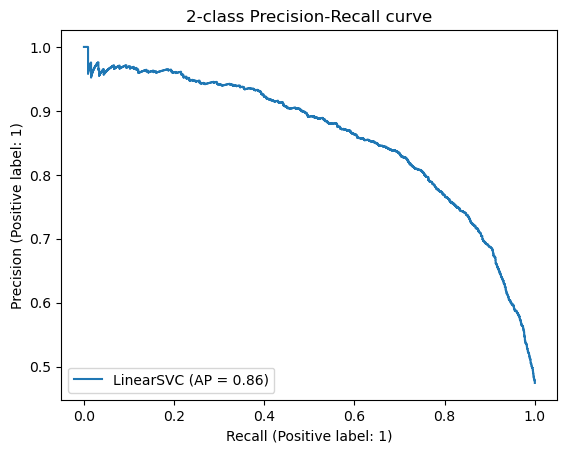

In [62]:
#Using the tuned decision tree parameters
dt2  =  DecisionTreeClassifier(criterion =  'gini', max_depth =  9, 
                                     max_features =  9, min_samples_leaf =  5,random_state  =  123)
dt2fit  =  dt2.fit(x2_train_sel, y2_train)
dt_y_pred2  =  dt2.predict(x2_test_sel)

accuracy  =  round(dt2.score(x2_test_sel, y2_test) * 100, 2)
precision  =  round(precision_score(y_true  =  y2_test, y_pred  =  dt_y_pred2) * 100, 2)
recall  =  round(recall_score(y_true  =  y2_test, y_pred  =  dt_y_pred2) * 100, 2)

print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')

# Plot the Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 123))
classifier.fit(x2_train_sel, y2_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x2_test_sel, y2_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

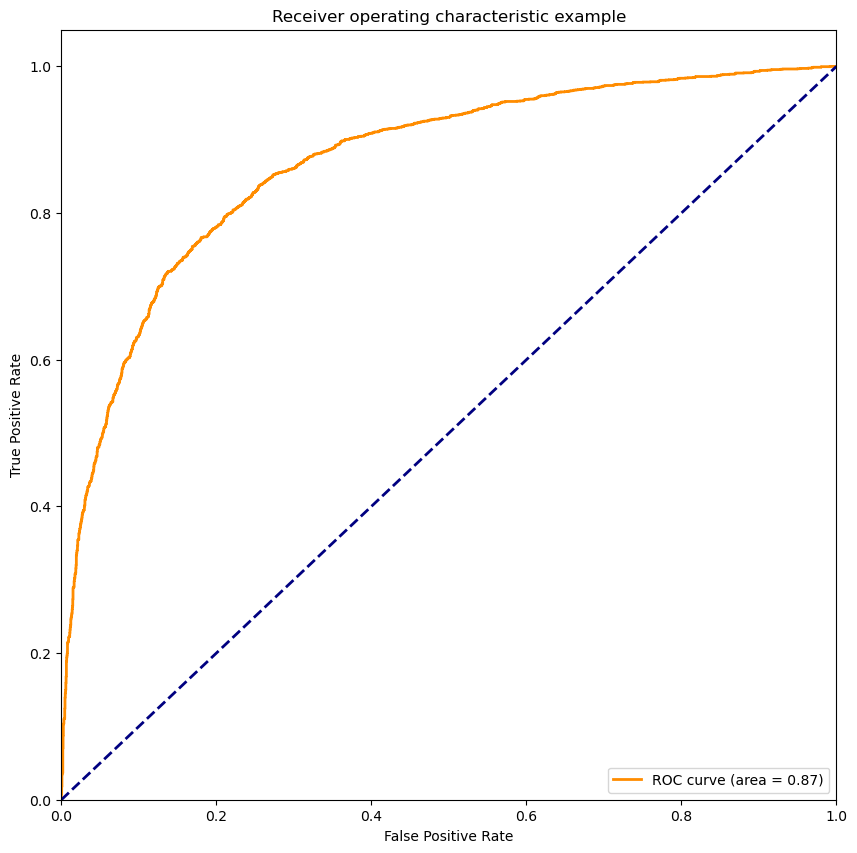

In [63]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 

# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True, random_state=123)
 
# Calculate the value of y_score by decision_function()
y2_score = svm.fit(x2_train_sel, y2_train).decision_function(x2_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold = roc_curve(y2_test, y2_score) 
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## method 2:PCA codes

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv('fl_preprocessing_pca.csv', index_col = 0)

### Split Training Test Data

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [123]:
# splitting test and training (H1N1)
x1  =  data.loc[:, ~data.columns.isin(['h1n1_vaccine'])]
y1  =  data["h1n1_vaccine"]

x1_train, x1_test, y1_train, y1_test  =  train_test_split(x1, y1, test_size = 0.2)

# splitting test and training (Seasonal Flu)
x2  =  data.loc[:, ~data.columns.isin(['seasonal_vaccine'])]
y2  =  data["seasonal_vaccine"]

x2_train, x2_test, y2_train, y2_test  =  train_test_split(x2, y2, test_size = 0.2)

# Standard scaling
scaler  =  StandardScaler()  
scaler.fit(x1_train)

x1_train  =  scaler.transform(x1_train)
x1_test  =  scaler.transform(x1_test)
 
scaler.fit(x2_train)

x2_train  =  scaler.transform(x2_train)
x2_test  =  scaler.transform(x2_test)


### Feature Selection - Logisti Regression

#### H1N1

In [124]:
sfm_h1n1 = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1',solver = 'liblinear'))
sfm_h1n1.fit(x1_train, y1_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [125]:
sfm_h1n1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [126]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
imputed_h1n1 = pd.DataFrame(imputer.fit_transform(x1_train))

# Imputation removed column names; put them back
imputed_h1n1.columns = x1.columns

selected_feat_h1n1= imputed_h1n1.columns[(sfm_h1n1.get_support())]
print('total features: {}'.format((x1_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_h1n1)))

print(selected_feat_h1n1)

total features: 61
selected features: 61
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       'seasonal_vaccine'],
      dtype='object')


#### Seasonal Flu

In [127]:
sfm_sea = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1',solver = 'liblinear'))
sfm_sea.fit(x2_train, y2_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [128]:
sfm_sea.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [129]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
imputed_sea = pd.DataFrame(imputer.fit_transform(x2_train))

# Imputation removed column names; put them back
imputed_sea.columns = x2.columns

selected_feat_sea= imputed_sea.columns[(sfm_sea.get_support())]
print('total features: {}'.format((x2_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_sea)))

print(selected_feat_sea)

total features: 61
selected features: 61
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       'h1n1_vaccine'],
      dtype='object')


### Feature Specification

In [130]:
x1_train_sel = sfm_h1n1.transform(x1_train)
x1_test_sel = sfm_h1n1.transform(x1_test)

x2_train_sel = sfm_sea.transform(x2_train)
x2_test_sel = sfm_sea.transform(x2_test)

In [131]:
x1_train_sel.shape, x1_test_sel.shape

((21365, 61), (5342, 61))

In [132]:
x1_train.shape, x1_test.shape

((21365, 61), (5342, 61))

In [133]:
x2_train_sel.shape, x2_test_sel.shape

((21365, 61), (5342, 61))

In [134]:
x2_train.shape, x2_test.shape

((21365, 61), (5342, 61))

### method 2.1: Random forest_h1n1

In [105]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:
#define parameter for RandomForestClassifier
param_dist   =   {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100]
        }

rf   =   RandomForestClassifier()

rf_cv1   =   RandomizedSearchCV(estimator  =  rf, 
                                   param_distributions  =  param_dist, 
                                   scoring  =  'roc_auc', 
                                   verbose  =  10)
rf_cv1.fit(x1_train_sel, y1_train)

print(rf_cv1.best_params_)
print(rf_cv1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.860 total time=   5.6s
[CV 2/5; 1/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.860 total time=   5.5s
[CV 3/5; 1/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.857 total time=   5.5s
[CV 4/5; 1/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.873 total time=   5.4s
[CV 5/5; 1/10] START bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/10] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.858 total time=   5.4s
[CV 1/5; 2/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 2/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.864 total time=  16.2s
[CV 2/5; 2/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 2/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.864 total time=  16.2s
[CV 3/5; 2/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 2/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/10] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.862 total time=  16.0s
[CV 2/5; 6/10] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/10] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.861 total time=  15.9s
[CV 3/5; 6/10] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/10] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.862 total time=  15.7s
[CV 4/5; 6/10] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/10] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.882 total time=  15.6s
[CV 5/5; 6/10] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/10] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.861 total time=  16.1s
[CV 1/5; 7/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.861 total time=   9.3s
[CV 2/5; 7/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.863 total time=   9.3s
[CV 3/5; 7/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.862 total time=   9.4s
[CV 4/5; 7/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.877 total time=   9.5s
[CV 5/5; 7/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.861 total time=   9.5s
[CV 1/5; 8/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.861 total time=   9.7s
[CV 2/5; 8/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.858 total time=   9.8s
[CV 3/5; 8/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.859 total time=   9.8s
[CV 4/5; 8/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.875 total time=   9.7s
[CV 5/5; 8/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.857 total time=   9.7s
[CV 1/5; 9/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 9/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.863 total time=  15.1s
[CV 2/5; 9/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 9/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.863 total time=  15.2s
[CV 3/5; 9/10] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 9/10] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on test set: 86.26%
Precision on test set: 71.05%
Recall on test set: 37.89%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


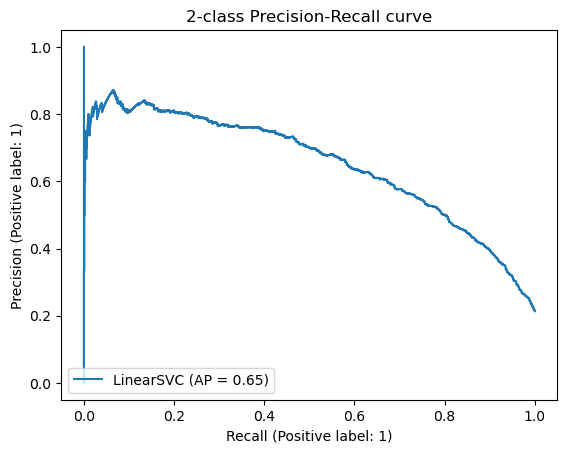

In [107]:
#Using the tuned random forest parameters
rf1  =  RandomForestClassifier(n_estimators  =  100,
                             min_samples_split  =  10,
                             min_samples_leaf  =  2,
                             max_features  =  'sqrt',
                             max_depth  =  20, 
                             bootstrap  =  False,
                             random_state  =  123)

rf_cv1  =  RandomizedSearchCV(rf1, param_distributions  =  param_dist, 
                           cv  =  10, scoring = 'roc_auc',random_state = 123, n_jobs  =  -1)

rfcv1fit  =  rf_cv1.fit(x1_train_sel, y1_train)
rf_y_pred  =  rf_cv1.predict(x1_test_sel)

accuracy  =  round(rf_cv1.score(x1_test_sel, y1_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

precision  =  round(precision_score(y_true = y1_test, y_pred = rf_y_pred) * 100, 2)
print(f"Precision on test set: {precision}%")

recall  =  round(recall_score(y_true = y1_test, y_pred = rf_y_pred) * 100, 2)
print(f"Recall on test set: {recall}%")

# Plot 2-class Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 50))
classifier.fit(x1_train_sel, y1_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x1_test_sel, y1_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

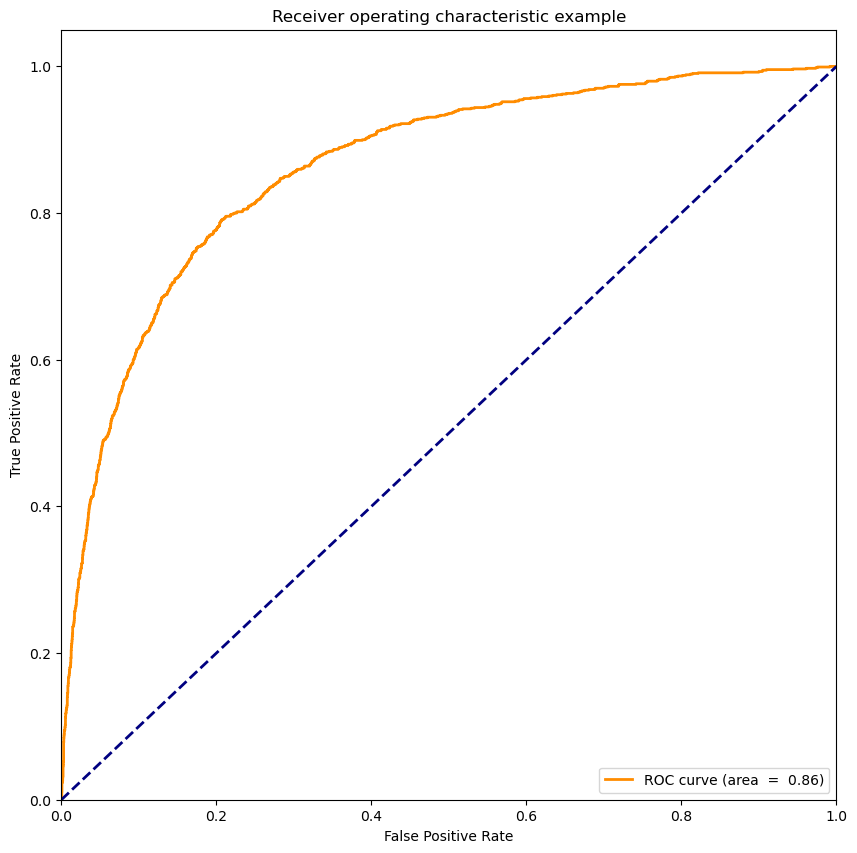

In [108]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 

# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True,random_state = 123)
 
# Calculate the value of y_score by decision_function()
y_score  =  svm.fit(x1_train_sel, y1_train).decision_function(x1_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y1_test, y_score)
roc_auc  =  auc(fpr,tpr)
 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 2.2: Decision Tree_h1n1

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [136]:
#instead of just doing the tree, trying to find the right parameters. 
param_dist  =  {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini"]}

tree  =  DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv  =  RandomizedSearchCV(tree, param_distributions = param_dist, cv = 10, n_iter = 100, random_state = 123)

# Fit it to the data
tree_cv.fit(x1_train_sel, y1_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 81.06%
Precision: 59.83%
Recall: 36.29%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


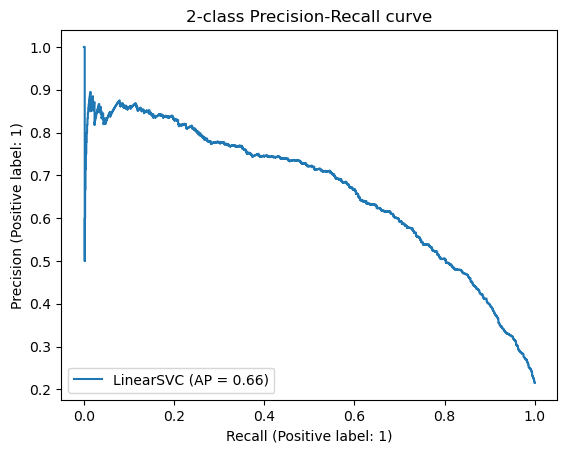

In [137]:
#Using the tuned decision tree parameters
dt2  =  DecisionTreeClassifier(criterion =  'gini', max_depth =  6, 
                                     max_features =  8, min_samples_leaf =  3, 
                                     random_state = 123)
dt2fit  =  dt2.fit(x1_train_sel, y1_train)
dt_y_pred2  =  dt2.predict(x1_test_sel)

accuracy  =  round(dt2.score(x1_test_sel, y1_test) * 100, 2)
precision  =  round(precision_score(y_true  =  y1_test, y_pred  =  dt_y_pred2) * 100, 2)
recall  =  round(recall_score(y_true  =  y1_test, y_pred  =  dt_y_pred2) * 100, 2)

print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')

# Plot the Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 123))
classifier.fit(x1_train_sel, y1_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x1_test_sel, y1_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

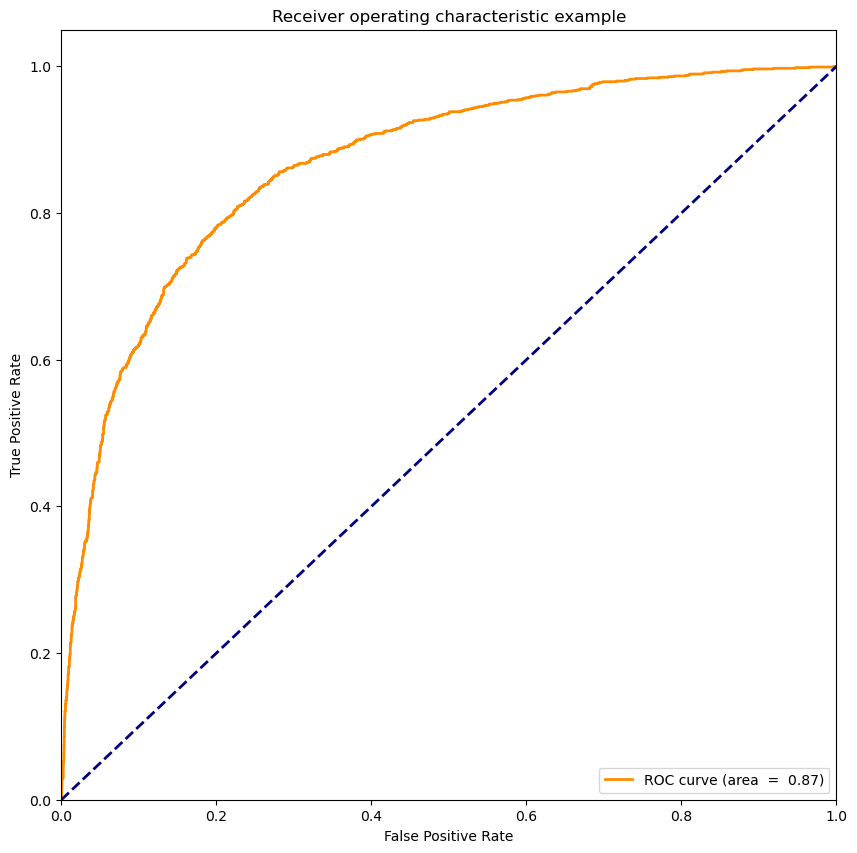

In [138]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 
# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True, random_state = 123)
 
# Calculate the value of y_score by decision_function()
y1_score  =  svm.fit(x1_train_sel, y1_train).decision_function(x1_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y1_test, y1_score) 
roc_auc  =  auc(fpr,tpr) 

 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 2.1: Random forest_seasonal

In [109]:
#define parameter for RandomForestClassifier
param_dist  =  {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100]
        }

rf  =  RandomForestClassifier()

rf_cv2  =  RandomizedSearchCV(estimator = rf, 
                                   param_distributions = param_dist, 
                                   scoring = 'roc_auc', 
                                   verbose = 10)
rf_cv2.fit(x2_train_sel, y2_train)

print(rf_cv2.best_params_)
print(rf_cv2.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.851 total time=   6.7s
[CV 2/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.861 total time=   6.7s
[CV 3/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.854 total time=   6.7s
[CV 4/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.853 total time=   6.7s
[CV 5/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.851 total time=   6.6s
[CV 1/5; 2/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.861 total time=  10.2s
[CV 2/5; 2/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.872 total time=  10.1s
[CV 3/5; 2/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.863 total time=  10.1s
[CV 4/5; 2/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.862 total time=  10.1s
[CV 5/5; 2/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.862 total time=  10.2s
[CV 1/5; 3/10] START bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 3/10] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.857 total time=   8.5s
[CV 2/5; 3/10] START bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 3/10] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.868 total time=   8.5s
[CV 3/5; 3/10] START bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 3/10] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, sco

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/10] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.858 total time=   8.4s
[CV 2/5; 4/10] START bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/10] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.868 total time=   8.4s
[CV 3/5; 4/10] START bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/10] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   8.4s
[CV 4/5; 4/10] START bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/10] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.859 total time=   8.4s
[CV 5/5; 4/10] START bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/10] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.859 total time=   8.4s
[CV 1/5; 5/10] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 5/10] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.861 total time=   6.3s
[CV 2/5; 5/10] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 5/10] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.872 total time=   6.3s
[CV 3/5; 5/10] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 5/10] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.862

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.862 total time=  10.2s
[CV 2/5; 8/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.873 total time=  10.0s
[CV 3/5; 8/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.863 total time=  10.0s
[CV 4/5; 8/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.863 total time=  10.0s
[CV 5/5; 8/10] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/10] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.862 total time=  10.1s
[CV 1/5; 9/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.854 total time=   4.2s
[CV 2/5; 9/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.864 total time=   4.2s
[CV 3/5; 9/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.855 total time=   4.2s
[CV 4/5; 9/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.853 total time=   4.2s
[CV 5/5; 9/10] START bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100


C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/10] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.855 total time=   4.2s
[CV 1/5; 10/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 10/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.861 total time=  10.1s
[CV 2/5; 10/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 10/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.872 total time=  10.0s
[CV 3/5; 10/10] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 10/10] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on test set: 86.66%
Precision on test set: 79.32%
Recall on test set: 74.43%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


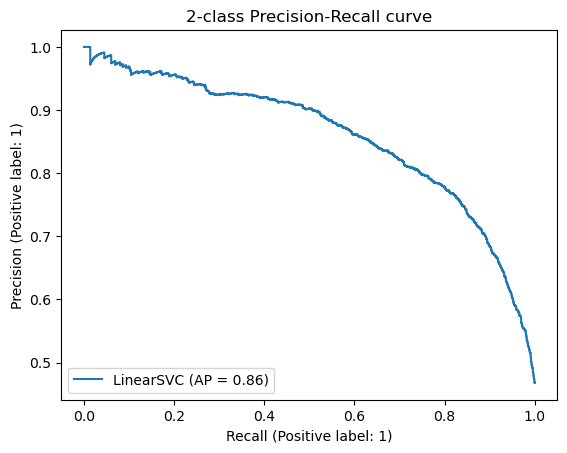

In [110]:
#Using the tuned random forest parameters
rf2  =  RandomForestClassifier(n_estimators  =  100,
                             min_samples_split  =  5,
                             min_samples_leaf  =  1,
                             max_features  =  'sqrt',
                             max_depth  =  10, 
                             bootstrap  =  False,
                             random_state  =  123)

rf_cv2  =  RandomizedSearchCV(rf2, param_distributions  =  param_dist, 
                           cv  =  10, scoring = 'roc_auc',random_state = 123, n_jobs  =  -1)

rfcv2fit  =  rf_cv2.fit(x2_train_sel, y2_train)
rf_y_pred  =  rf_cv2.predict(x2_test_sel)


accuracy  =  round(rf_cv2.score(x2_test_sel, y2_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

precision  =  round(precision_score(y_true = y2_test, y_pred = rf_y_pred) * 100, 2)
print(f"Precision on test set: {precision}%")

recall  =  round(recall_score(y_true = y2_test, y_pred = rf_y_pred) * 100, 2)
print(f"Recall on test set: {recall}%")

# Plot 2-class Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 50))
classifier.fit(x2_train, y2_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x2_test, y2_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

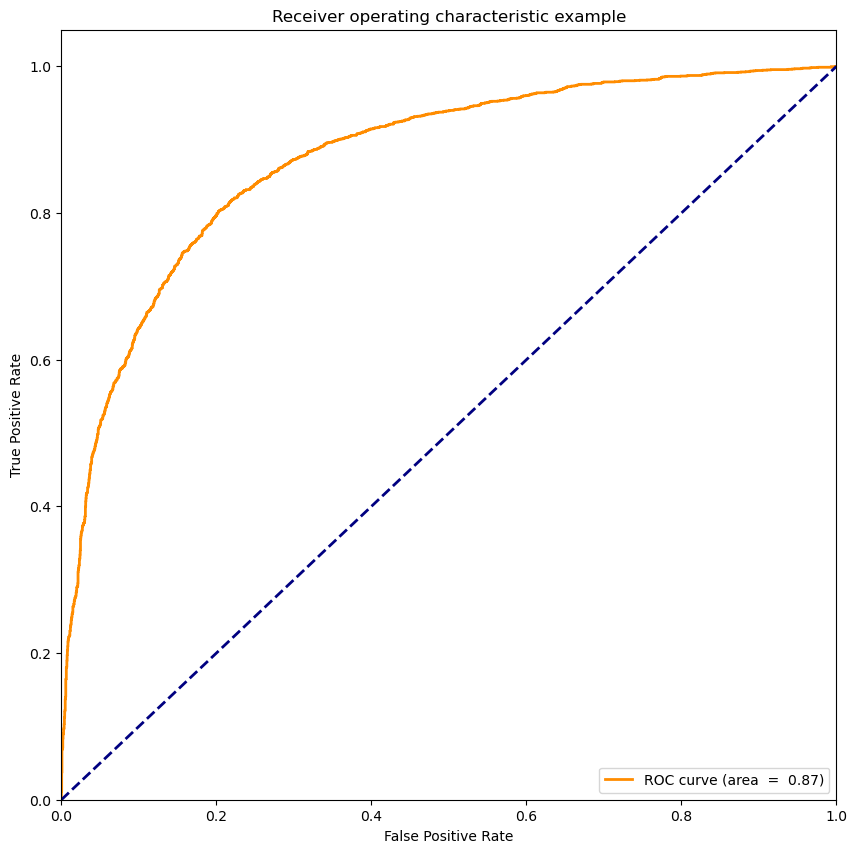

In [111]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 


# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True,random_state = 50)
 
# Calculate the value of y_score by decision_function()
y_score  =  svm.fit(x2_train_sel, y2_train).decision_function(x2_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y2_test, y_score) 
roc_auc  =  auc(fpr,tpr) 
 
plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### method 2.2: Decision Tree_seasonal

In [139]:
#instead of just doing the tree, trying to find the right parameters. 
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini"]}

tree = DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=10, n_iter=100, random_state=123)

# Fit it to the data
tree_cv.fit(x2_train_sel, y2_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 9, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


Accuracy: 67.33%
Precision: 71.56%
Recall: 50.76%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


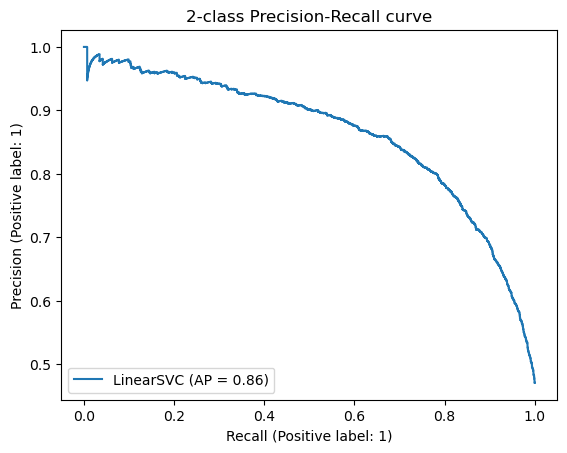

In [140]:
#Using the tuned decision tree parameters
dt2  =  DecisionTreeClassifier(criterion =  'gini', max_depth =  7, 
                                     max_features =  9, min_samples_leaf =  9,random_state  =  123)
dt2fit  =  dt2.fit(x2_train_sel, y2_train)
dt_y_pred2  =  dt2.predict(x2_test_sel)

accuracy  =  round(dt2.score(x2_test_sel, y2_test) * 100, 2)
precision  =  round(precision_score(y_true  =  y2_test, y_pred  =  dt_y_pred2) * 100, 2)
recall  =  round(recall_score(y_true  =  y2_test, y_pred  =  dt_y_pred2) * 100, 2)

print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')

# Plot the Precision-Recall curve
classifier  =  make_pipeline(StandardScaler(), LinearSVC(random_state = 123))
classifier.fit(x2_train_sel, y2_train)

display  =  PrecisionRecallDisplay.from_estimator(classifier, x2_test_sel, y2_test, name = "LinearSVC")
_  =  display.ax_.set_title("2-class Precision-Recall curve")

<Figure size 640x480 with 0 Axes>

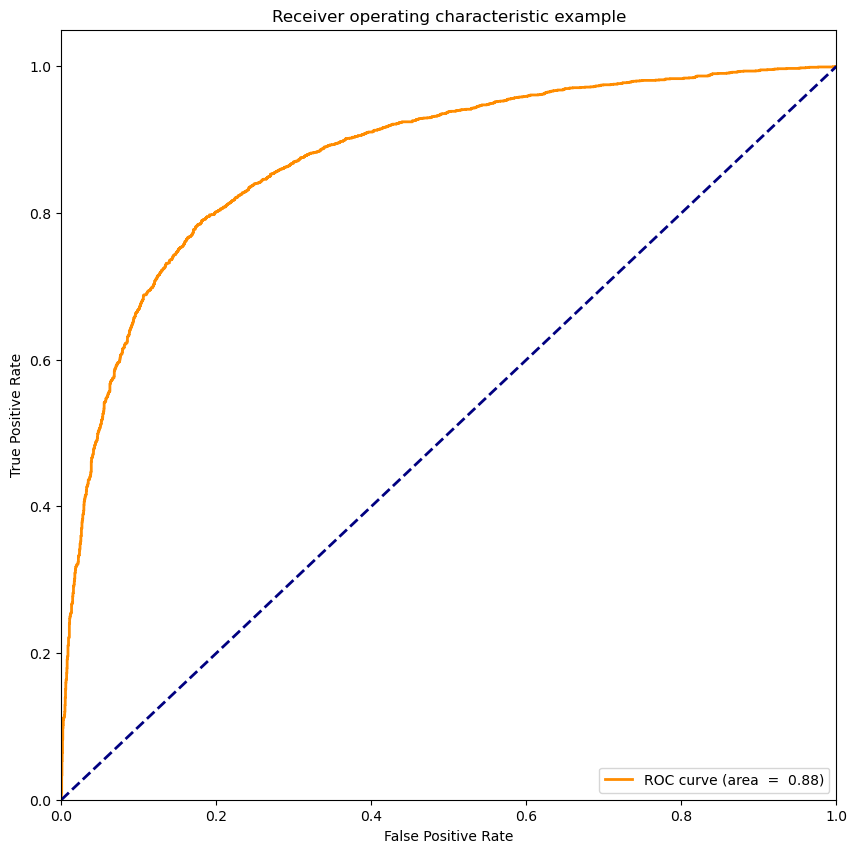

In [141]:
# Calculate and plot ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc 

# Learn to predict each class against the other
svm  =  svm.SVC(kernel = 'linear', probability = True, random_state = 123)
 
# Calculate the value of y_score by decision_function()
y2_score  =  svm.fit(x2_train_sel, y2_train).decision_function(x2_test_sel)
 
# Calculate the true positive rate and false positive rate
fpr,tpr,threshold  =  roc_curve(y2_test, y2_score)
roc_auc  =  auc(fpr,tpr) 

plt.figure()
lw  =  2
plt.figure(figsize = (10,10))
# The false positive rate is the abscissa and the true rate is the ordinate to make the curve
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area  =  %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Validating

In [142]:
# Caculate the vaccination probabilities of H1N1 and seasonal flu
h1n1_valid_pred = rfcv1fit.predict(x1_test_sel)
h1n1_valid_proba = rfcv1fit.predict_proba(x1_test_sel)[:,1]
seasonal_valid_pred = rfcv2fit.predict(x2_test_sel)
seasonal_valid_proba = rfcv2fit.predict_proba(x2_test_sel)[:,1]
print(h1n1_valid_proba)
print(seasonal_valid_proba)

[0.02507438 0.01561423 0.12452172 ... 0.28404836 0.09807501 0.02250973]
[0.63183396 0.87306777 0.88866205 ... 0.21257576 0.98598364 0.93960378]


In [143]:
# Output table
full_pred = [h1n1_valid_proba, seasonal_valid_proba]

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": full_pred[0],
        "seasonal_vaccine":full_pred[1],
    },
    index = y1_test.index
)

print("y_preds.shape:", y_preds.shape)
y_preds

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
21743,0.025074,0.631834
16347,0.015614,0.873068
21510,0.124522,0.888662
8277,0.070226,0.075804
24389,0.758592,0.074293
...,...,...
2127,0.007177,0.145050
12799,0.021902,0.094410
2499,0.284048,0.212576
20042,0.098075,0.985984


In [144]:
# print the accuracy of trainning process
from sklearn.metrics import accuracy_score
accuracy_h1n1_valid_pred = accuracy_score(h1n1_valid_pred, y1_test)
accuracy_seasonal_valid_pred = accuracy_score(seasonal_valid_pred, y2_test)
print(f"The accuracy of H1N1 Vaccine is: {round(accuracy_h1n1_valid_pred * 100, 2)}%")
print(f"The accuracy of Seasonal Vaccine is: {round(accuracy_seasonal_valid_pred * 100, 2)}%")

The accuracy of H1N1 Vaccine is: 95.98%
The accuracy of Seasonal Vaccine is: 96.26%


# Predicting

###### pre-processing  test data with PCA, and predict the rate of H1N1 and Seasonal Flu vaccine

In [145]:
df_test = pd.read_csv('test_set_features.csv', index_col = 0)
df_sub = pd.read_csv('submission_format.csv', index_col = 0)

In [146]:
# convert text labels to hot code
df_test  =  pd.concat([df_test,
                        pd.get_dummies(df_test['age_group'], prefix = 'age'),
                        pd.get_dummies(df_test['education'], prefix = 'education'),
                        pd.get_dummies(df_test['race'], prefix = 'race'),
                        pd.get_dummies(df_test['sex'], prefix = 'sex'),
                        pd.get_dummies(df_test['income_poverty'], prefix = 'income_poverty'),
                        pd.get_dummies(df_test['marital_status'], prefix = 'marital_status'),
                        pd.get_dummies(df_test['rent_or_own'], prefix = 'rent_or_own'),
                        pd.get_dummies(df_test['employment_status'], prefix = 'employment_status'),
                        pd.get_dummies(df_test['hhs_geo_region'], prefix = 'hhs_geo_region'),
                        pd.get_dummies(df_test['census_msa'], prefix = 'census_msa'),
                        pd.get_dummies(df_test['employment_industry'], prefix = 'employment_industry'),
                        pd.get_dummies(df_test['employment_occupation'], prefix = 'employment_occupation'),],axis = 1)
 
df_test.drop(['age_group'],axis = 1, inplace = True)
df_test.drop(['education'],axis = 1, inplace = True)
df_test.drop(['race'],axis = 1, inplace = True)
df_test.drop(['sex'],axis = 1, inplace = True)
df_test.drop(['income_poverty'],axis = 1, inplace = True)
df_test.drop(['marital_status'],axis = 1, inplace = True)
df_test.drop(['rent_or_own'],axis = 1, inplace = True)
df_test.drop(['employment_status'],axis = 1, inplace = True)
df_test.drop(['hhs_geo_region'],axis = 1, inplace = True)
df_test.drop(['census_msa'],axis = 1, inplace = True)
df_test.drop(['employment_industry'],axis = 1, inplace = True)
df_test.drop(['employment_occupation'],axis = 1, inplace = True)

df_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
for col in df_test:
    # imputation with mode
    df_test[col].fillna(df_test[col].mode()[0], inplace = True)
df_test.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 105, dtype: int64

In [148]:
# Calculate the cumulative contribution rate of principal components
pca=PCA()
pca.fit(df_test)
print(np.cumsum(pca.explained_variance_ratio_))

[0.19736358 0.30272545 0.36274237 0.41702996 0.46358101 0.50125476
 0.53613007 0.56875624 0.59680028 0.62266781 0.6468906  0.66805935
 0.68619409 0.70413607 0.72091036 0.73681245 0.75025395 0.76351385
 0.77591925 0.78790207 0.79821357 0.80817075 0.81781119 0.82672842
 0.83542256 0.84350654 0.85095797 0.85835702 0.86552572 0.87198475
 0.87781607 0.88326832 0.88867197 0.89383788 0.89888124 0.9038216
 0.90869247 0.91320017 0.9176112  0.9219451  0.92614588 0.92995781
 0.93368484 0.9373401  0.94086602 0.94422035 0.94748308 0.9506359
 0.95367179 0.95657585 0.95943546 0.96216179 0.96448492 0.96678702
 0.96894696 0.97099294 0.97299605 0.97489062 0.97660325 0.97812049
 0.9795671  0.98096894 0.98230077 0.98356746 0.98470862 0.98581116
 0.98684376 0.98771119 0.98852263 0.98930234 0.99001379 0.99067123
 0.99131775 0.99195044 0.99255807 0.99313669 0.99367778 0.9941966
 0.99469179 0.99517544 0.99562464 0.99606089 0.99647372 0.99688011
 0.99726698 0.99764963 0.99800704 0.99834631 0.9986726  0.9989962

Text(0.5, 1.0, 'Scree Plot')

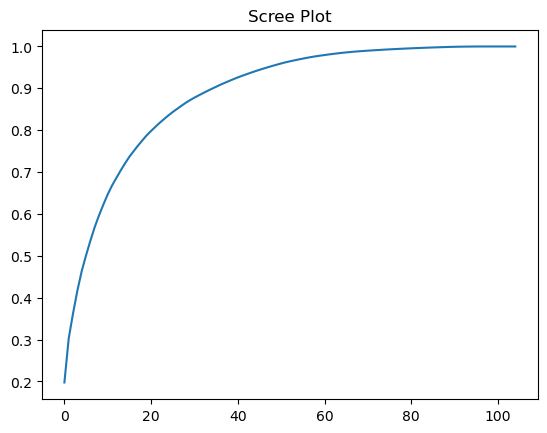

In [149]:
# scree plot and choose the suitable number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')

In [150]:
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components = 60)
X_pca = pca.fit_transform(df_test)
X_pca = pd.DataFrame(X_pca, index = df_sub.index)
X_pca

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,-1.972338,-1.064634,-1.070809,-1.689041,-0.244256,-0.788172,0.315300,0.033931,-1.097934,0.118279,...,0.133508,-0.613161,0.078777,-0.345177,-0.365303,-0.019135,0.271419,-0.613019,-0.350914,0.143523
26708,-2.899447,-0.143050,-0.103060,-0.750990,0.196285,-0.362144,-0.216837,0.689547,1.412031,1.660973,...,0.082107,-0.056504,0.465825,0.283843,-0.020364,0.126498,0.095685,-0.900239,-0.785816,0.499682
26709,2.464289,-0.790362,-0.080624,-0.466566,1.753851,-0.869539,-1.157734,-0.769200,0.060038,0.123388,...,0.279483,-0.149840,0.065737,0.014952,-0.073734,-0.262450,0.115371,-0.114753,0.025061,-0.135485
26710,0.102929,-0.815610,-0.417604,0.999494,0.775460,0.970380,-0.134849,-0.186792,0.674937,-0.020809,...,-0.055244,-0.123473,0.014101,-0.050781,-0.105799,0.054988,-0.034403,0.003952,0.000229,-0.000055
26711,1.955817,0.085110,-0.504439,-0.288394,-1.086551,0.465254,1.168851,0.397056,-1.776496,0.810611,...,0.643516,-0.278479,-0.480194,0.301765,0.144111,0.751600,-0.406764,0.299059,-0.131700,0.030200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,-1.123514,-0.483480,0.354873,-0.406653,-0.625700,-0.097615,0.467603,0.589614,0.085384,-0.163859,...,-0.118512,-0.108888,-0.000676,-0.018644,0.923988,-0.096725,0.241809,-0.128964,0.035851,0.016692
53411,-0.882144,-0.225602,0.656707,-2.033750,0.498014,-0.301677,2.797569,0.014380,-0.114966,0.529573,...,-0.020827,-0.024797,0.365046,0.475846,0.180697,-0.078316,-0.263763,-0.111381,0.136100,0.114638
53412,-1.133307,-1.383348,0.226715,1.285508,0.304080,-0.608086,-0.138328,1.529763,1.058411,0.026999,...,-0.011921,-0.023775,-0.149342,-0.161849,-0.073931,-0.028290,0.054425,0.025244,0.033195,0.012373


In [151]:
df_full = X_pca.join(df_sub)
df_full

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,-1.972338,-1.064634,-1.070809,-1.689041,-0.244256,-0.788172,0.315300,0.033931,-1.097934,0.118279,...,0.078777,-0.345177,-0.365303,-0.019135,0.271419,-0.613019,-0.350914,0.143523,0.5,0.7
26708,-2.899447,-0.143050,-0.103060,-0.750990,0.196285,-0.362144,-0.216837,0.689547,1.412031,1.660973,...,0.465825,0.283843,-0.020364,0.126498,0.095685,-0.900239,-0.785816,0.499682,0.5,0.7
26709,2.464289,-0.790362,-0.080624,-0.466566,1.753851,-0.869539,-1.157734,-0.769200,0.060038,0.123388,...,0.065737,0.014952,-0.073734,-0.262450,0.115371,-0.114753,0.025061,-0.135485,0.5,0.7
26710,0.102929,-0.815610,-0.417604,0.999494,0.775460,0.970380,-0.134849,-0.186792,0.674937,-0.020809,...,0.014101,-0.050781,-0.105799,0.054988,-0.034403,0.003952,0.000229,-0.000055,0.5,0.7
26711,1.955817,0.085110,-0.504439,-0.288394,-1.086551,0.465254,1.168851,0.397056,-1.776496,0.810611,...,-0.480194,0.301765,0.144111,0.751600,-0.406764,0.299059,-0.131700,0.030200,0.5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,-1.123514,-0.483480,0.354873,-0.406653,-0.625700,-0.097615,0.467603,0.589614,0.085384,-0.163859,...,-0.000676,-0.018644,0.923988,-0.096725,0.241809,-0.128964,0.035851,0.016692,0.5,0.7
53411,-0.882144,-0.225602,0.656707,-2.033750,0.498014,-0.301677,2.797569,0.014380,-0.114966,0.529573,...,0.365046,0.475846,0.180697,-0.078316,-0.263763,-0.111381,0.136100,0.114638,0.5,0.7
53412,-1.133307,-1.383348,0.226715,1.285508,0.304080,-0.608086,-0.138328,1.529763,1.058411,0.026999,...,-0.149342,-0.161849,-0.073931,-0.028290,0.054425,0.025244,0.033195,0.012373,0.5,0.7


In [152]:
# Select columns that do not contain H1N1
x1  =  df_full.loc[:, ~df_full.columns.isin(['h1n1_vaccine'])]
y1  =  df_full["h1n1_vaccine"]

# Select columns that do not contain Seasonal Flu
x2  =  df_full.loc[:, ~df_full.columns.isin(['seasonal_vaccine'])]
y2  =  df_full["seasonal_vaccine"]

In [153]:
# Calculate the vaccination probabilities of H1N1 and seasonal flu
h1n1_pred = rfcv1fit.predict(x1)
h1n1_proba = rfcv1fit.predict_proba(x1)[:,1]
seasonal_pred = rfcv2fit.predict(x2)
seasonal_proba = rfcv2fit.predict_proba(x2)[:,1]
print(h1n1_proba)
print(seasonal_proba)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[0.19613304 0.19193663 0.46266621 ... 0.24689218 0.23983277 0.25733339]
[0.58487317 0.08696297 0.66599694 ... 0.54431572 0.28513666 0.6349959 ]


In [154]:
submission_format = df_sub.drop(columns=["h1n1_vaccine","seasonal_vaccine"],
                                           axis = 1)
flu_submission = submission_format.join(y_preds)
print(flu_submission.shape)
flu_submission.head()


(26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,NaN,NaN
26708,NaN,NaN
26709,NaN,NaN
26710,NaN,NaN
26711,NaN,NaN


In [155]:
# Output table
full_pred = [h1n1_proba, seasonal_proba]

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": full_pred[0],
        "seasonal_vaccine":full_pred[1],
    },
    index = df_sub.index
)

print("y_preds.shape:", y_preds.shape)
y_preds

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.196133,0.584873
26708,0.191937,0.086963
26709,0.462666,0.665997
26710,0.333999,0.655278
26711,0.371187,0.406929
...,...,...
53410,0.151510,0.281031
53411,0.206932,0.225573
53412,0.246892,0.544316


In [156]:
y_preds.to_csv('submit.csv')